# Introduction to machine learning with scikit-learn

By: Ana Matran-Fernandez

Based on the [scikit-learn documentation](http://scikit-learn.org/stable/tutorial/basic/tutorial.html)

Now that we've learnt how to train a classifier, we are going to do this properly.

We first need to reload the dataset and the necessary libraries

# Loading the 'breast cancer' dataset and importing necessary libraries

In [12]:
import numpy as np
import sklearn
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
cancer = datasets.load_breast_cancer()

# Learning and predicting


In scikit-learn, an estimator for classification is a Python object that implements the methods `fit(X, y)` and `predict(T)`.


# Train-test split

In the previous workbook, we measured the performance of our classifiers using all the dataset, including the samples that we had used for training our models.

**Learning the parameters of a prediction function and testing it on the same data is a methodological mistake**: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set `X_test`, `y_test`.

In [14]:
from sklearn import svm

In [15]:
clf = svm.SVC(gamma=0.0001, C=100.)

We call our estimator instance `clf`, as it is a classifier. **It now must be fitted to the model, that is, it must learn from the data**. This is done by passing our training set to the `fit` method. 

Let's use sklearn to generate a training and a test set from the cancer dataset.

In [16]:
from sklearn.model_selection import train_test_split 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [17]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.33, random_state=42)
# This selects 33% of the dataset for testing

In [18]:
# Now train your model using only the training set
clf.fit(X_train,y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Now predict the values of the test set

In [19]:
y_pred = clf.predict(X_test)
print(y_pred)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 0 1]


What's the accuracy on the train set? And on the test set?

In [20]:
from sklearn.metrics import accuracy_score

print("Accuracy on training set: %.2f%%" % (accuracy_score(y_train,clf.predict(X_train))))
print("Accuracy on test set: %.2f%%" % (accuracy_score(y_test,y_pred)))

Accuracy on training set: 1.00%
Accuracy on test set: 0.94%


## Random forests

Replicate the work above using a random forest classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
# Train the random forest classifier with the training set
clf = RandomForestClassifier()# Insert code here
# Insert code here to train the classifier
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

C:\Users\CLL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


What's the accuracy of the classifier?

Now you can use some time to explore different classification metrics and see what information they give you. Have a look at the sklearn documentation: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [24]:
# Insert code here
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
print('Accuracy: {}%'.format(accuracy_score(y_test,y_pred)))
# Classification report
print("Classification report:")
print(classification_report(y_test,y_pred))

Accuracy: 0.9521276595744681%
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        67
           1       0.96      0.97      0.96       121

    accuracy                           0.95       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188



We can look at what are the most important features from our dataset according to the random forest classifier

[27 23 22 20  2  6 10 26  0  1  7 24 21  8 12 13 25 14  4 19 28 15  9 29
 16  5  3 11 18 17]
Feature ranking:
1. worst concave points (0.289964)
2. worst area (0.130318)
3. worst perimeter (0.096123)
4. worst radius (0.093346)
5. mean perimeter (0.079011)
6. mean concavity (0.053778)
7. radius error (0.048087)
8. worst concavity (0.027796)
9. mean radius (0.026844)
10. mean texture (0.020073)
11. mean concave points (0.016518)
12. worst smoothness (0.015238)
13. worst texture (0.014321)
14. mean symmetry (0.008593)
15. perimeter error (0.008297)
16. area error (0.007616)
17. worst compactness (0.007536)
18. smoothness error (0.006504)
19. mean smoothness (0.006500)
20. fractal dimension error (0.006172)
21. worst symmetry (0.005803)
22. compactness error (0.005488)
23. mean fractal dimension (0.005044)
24. worst fractal dimension (0.004360)
25. concavity error (0.003930)
26. mean compactness (0.003874)
27. mean area (0.003450)
28. texture error (0.003100)
29. symmetry error (0.002199)


(0, 0.6715597685540922)

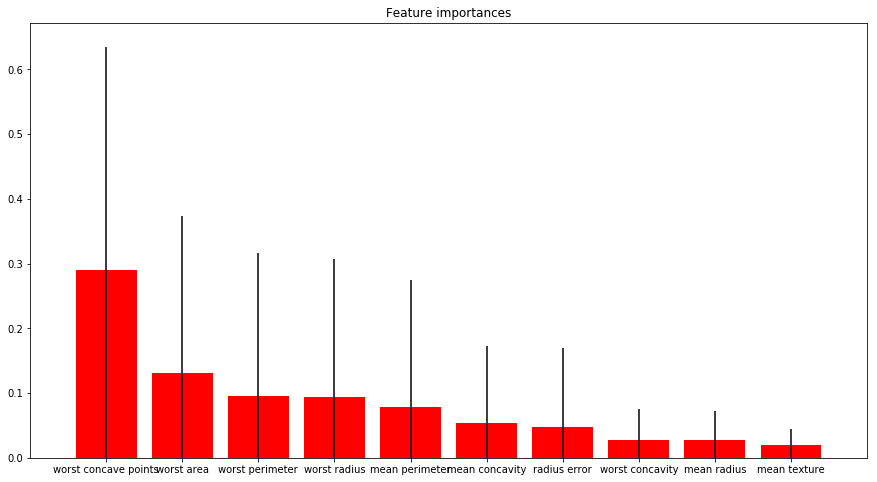

In [25]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")
n_features = cancer.data.shape[-1]
for f in range(n_features):
    print("%d. %s (%f)" % (f + 1, cancer.feature_names[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")  # just the top 10 features
num_feat_to_plot = 10
plt.bar(range(num_feat_to_plot), importances[indices[:num_feat_to_plot]],
       color="r", yerr=std[indices[:num_feat_to_plot]], align="center")
plt.xticks(range(num_feat_to_plot), np.array(cancer.feature_names)[indices[:num_feat_to_plot]])
plt.xlim([-1, num_feat_to_plot])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0, None])

#plt.savefig("importances.png",bbox_inches='tight')
#plt.savefig("importances.pdf",bbox_inches='tight')

Now plot the distributions of values of the top 5 features. Are there any relationships between them? You can use functions from seaborn such as distplot or jointplot to look at this.

# Standardisation

Did you figure out whether your data should be standardised? If so, play with different methods from the sklearn library.
You can get some ideas here: https://scikit-learn.org/stable/modules/preprocessing.html

Make sure your data still looks OK before attempting to re-train a classifier (i.e., plot it!).

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

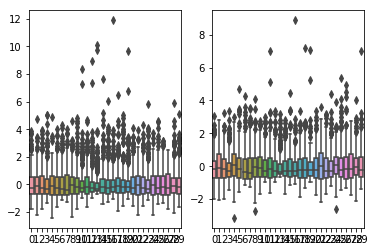

In [28]:
plt.subplot(1,2,1)
sns.boxplot(data=X_train_sc)
plt.subplot(1,2,2)
sns.boxplot(data=X_test_sc)

After you've standardised your data, fit a new random forest classifier and compare its performance with the one of the random forest without standardisation.

Is the performance affected by this processing?

In [31]:
# Insert code here
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)# Insert code here

C:\Users\CLL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [32]:
# Accuracy
accuracy = accuracy_score(y_test,y_pred)# Insert code here
print('Accuracy: {}%'.format(accuracy*100))
# Classification report
print("Classification report:")
clf_report = classification_report(y_test,y_pred)# Insert code here
print(clf_report)

Accuracy: 96.27659574468085%
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.97      0.97      0.97       121

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188

